## Problem Statement


You are a data scientist working for a sports analytics company. The dataset, named **"sports_league_data.csv"** includes a variety of attributes for players in the league. The columns in the dataset are as follows:

- **player_id:** A unique identifier for each player.
- **age:** Age of the player.
- **position:** The position the player typically plays in (e.g., Forward, Midfielder, Defender, Goalkeeper).
- **team:** The team the player belongs to.
- **games_played:** The total number of games played by the player in the season.
- **player_rating:** An overall performance rating for the player for the season.

**Import Necessary Libraries**

## Task1

1. Import the data from the "sports_league_data.csv" file.
2. display the number of rows and columns. 
3. Display the first few rows of the dataset to get an overview.


In [3]:
import pandas as pd

df = pd.read_csv('sports_league_data.csv')
df.head()

,player_id,age,position,team,games_played,player_rating
0,P0001,34,Forward,Team 14,29,7.2
1,P0002,29,Defender,Team 15,27,8.3
2,P0003,31,Goalkeeper,Team 4,39,6.4
3,P0004,36,Goalkeeper,Team 6,35,6.6
4,P0005,34,Defender,Team 14,26,7.2


In [4]:
df.shape

(1000, 6)

## Task2:

**Age Analysis:**
- Mean: Calculate the average age of players in the league.
- Standard Deviation Intervals:
    - Calculate the age range within one standard deviation of the mean.
    - Calculate the age range within two standard deviations of the mean.
    - Calculate the age range within three standard deviations of the mean.
  

In [8]:
df_mean_age = round(df['age'].mean())
df_std_age = round(df['age'].std())
df_mean_age, df_std_age

(27, 5)

In [10]:
# the age range within one standard deviation of the mean

df_std1_left = df_mean_age - df_std_age
df_std1_right = df_mean_age + df_std_age

df_std1_left, df_std1_right

(22, 32)

In [11]:
df_std2_left = df_mean_age - df_std_age*2
df_std2_right = df_mean_age + df_std_age*2

df_std2_left, df_std2_right

(17, 37)

In [12]:
df_std3_left = df_mean_age - df_std_age*3
df_std3_right = df_mean_age + df_std_age*3

df_std3_left, df_std3_right

(12, 42)

## Task3:

**Player Rating Analysis:**
- Mean: Determine the average player rating across the league.
- Standard Deviation Intervals:
    - Calculate the player rating range within one standard deviation of the mean.
    - Calculate the player rating range within two standard deviations of the mean.
    - Calculate the player rating range within three standard deviations of the mean.

In [13]:
df_mean_rating = round(df['player_rating'].mean())
df_std_rating = round(df['player_rating'].std())

df_mean_rating, df_std_rating

(7, 1)

In [14]:
# the age range within one standard deviation of the mean

df_std1_left = df_mean_rating - df_std_rating
df_std1_right = df_mean_rating + df_std_rating

df_std1_left, df_std1_right

(6, 8)

In [15]:
df_std2_left = df_mean_rating - df_std_rating*2
df_std2_right = df_mean_rating + df_std_rating*2

df_std2_left, df_std2_right

(5, 9)

In [16]:
df_std3_left = df_mean_rating - df_std_rating*3
df_std3_right = df_mean_rating + df_std_rating*3

df_std3_left, df_std3_right

(4, 10)

## Task4:

Create histogram with Kernel Density Estimation (KDE) plots for both the 'age' and 'player_rating' columns from the dataset. While constructing these plots, ensure to visually represent the standard deviation intervals on the graph.


- **'age'**

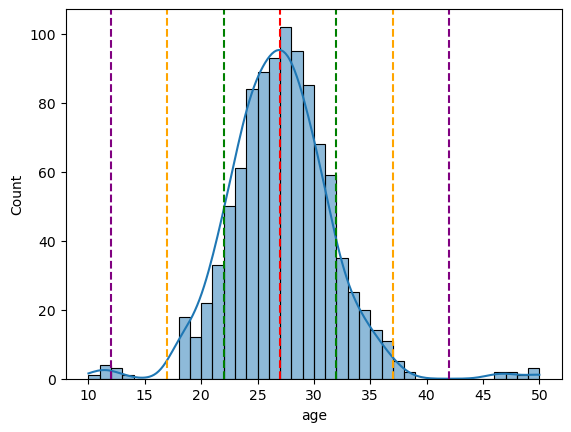

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.histplot(df.age, kde=True)

# Add vertical lines for mean, mean + std, and mean - std
plt.axvline(df_mean_age, color='red', linestyle='--', label='Mean')

plt.axvline(df_mean_age + df_std_age, color='green', linestyle='--', label='Mean + 1 Std')
plt.axvline(df_mean_age - df_std_age, color='green', linestyle='--', label='Mean - 1 Std')

plt.axvline(df_mean_age + df_std_age*2, color='orange', linestyle='--', label='Mean + 1 Std')
plt.axvline(df_mean_age - df_std_age*2, color='orange', linestyle='--', label='Mean - 1 Std')

plt.axvline(df_mean_age + df_std_age*3, color='purple', linestyle='--', label='Mean + 1 Std')
plt.axvline(df_mean_age - df_std_age*3, color='purple', linestyle='--', label='Mean - 1 Std')

- **'player_rating'**

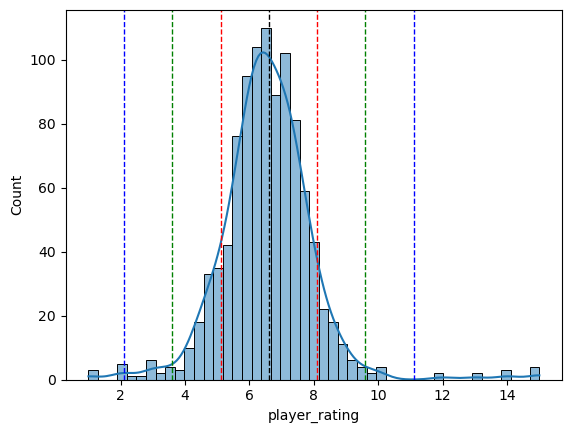

In [19]:
#stats for mean
mean = round(df['player_rating'].mean(), 1)
std = round(df['player_rating'].std(),1)



sns.histplot(df.player_rating, kde=True)

plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)

# one stadard deviation
plt.axvline(mean + std, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean - std, color='r', linestyle='dashed', linewidth=1)

# two standard deviation
plt.axvline(mean + 2*std, color='g', linestyle='dashed', linewidth=1)
plt.axvline(mean - 2*std, color='g', linestyle='dashed', linewidth=1)

# three standard deviation
plt.axvline(mean + 3*std, color='b', linestyle='dashed', linewidth=1)
plt.axvline(mean - 3*std, color='b', linestyle='dashed', linewidth=1)

## Task5

- Calculate the lower and upper boundaries for the 'Age' and 'Player_Rating' columns. 
- For each column, identify values that fall outside the calculated lower and upper boundaries. These values are considered outliers.

- **Display age outliers**

In [22]:
lower_age = round(df.age.mean() - df.age.std()*3, 2)
upper_age = round(df.age.mean() + df.age.std()*3, 2)

lower_age, upper_age

(13.13, 40.58)

- **Display player_rating outliers**

In [23]:
lower_rating = round(df.player_rating.mean() - df.player_rating.std()*3, 2)
upper_rating = round(df.player_rating.mean() + df.player_rating.std()*3, 2)

lower_rating, upper_rating

(2.19, 10.92)

## Task6

-  Remove outliers from both the 'age' and 'player_rating' columns and then visualize the adjusted data using histogram plots.


In [33]:
outlier_age = df[(df['age'] < lower_age) | (df['age'] > upper_age)]
outlier_age

,player_id,age,position,team,games_played,player_rating
66,P0067,11,Midfielder,Team 18,38,6.4
123,P0124,50,Midfielder,Team 11,23,5.9
156,P0157,46,Midfielder,Team 6,16,4.5
207,P0208,10,Forward,Team 15,30,6.0
305,P0306,47,Midfielder,Team 7,22,7.6
376,P0377,11,Defender,Team 16,25,6.1
474,P0475,50,Goalkeeper,Team 4,24,7.4
630,P0631,47,Defender,Team 16,28,6.0
647,P0648,12,Goalkeeper,Team 16,21,6.1
795,P0796,11,Goalkeeper,Team 8,33,7.5


In [32]:
outlier_rating = df[(df['player_rating'] < lower_rating) | (df['player_rating'] > upper_rating)]
outlier_rating

,player_id,age,position,team,games_played,player_rating
32,P0033,23,Defender,Team 1,29,2.0
41,P0042,21,Goalkeeper,Team 19,27,13.0
96,P0097,27,Defender,Team 2,37,2.0
116,P0117,31,Goalkeeper,Team 19,25,2.1
194,P0195,29,Forward,Team 6,33,1.0
212,P0213,30,Defender,Team 7,26,15.0
297,P0298,29,Goalkeeper,Team 17,31,2.0
301,P0302,34,Defender,Team 19,30,15.0
315,P0316,27,Midfielder,Team 15,28,13.0
387,P0388,21,Goalkeeper,Team 1,35,14.0


In [45]:
df= df[(df.age>lower_age)&(df.age<upper_age)]
df.describe()

,age,games_played,player_rating
count,983.000000,983.000000,983.000000
mean,26.822991,30.261445,6.558393
std,3.930040,5.365444,1.461909
min,18.000000,15.000000,1.000000
25%,24.000000,26.000000,5.800000
50%,27.000000,30.000000,6.500000
75%,29.000000,34.000000,7.300000
max,38.000000,50.000000,15.000000


In [47]:
df= df[(df.player_rating>lower_rating)&(df.player_rating<upper_rating)]
df.describe()

,age,games_played,player_rating
count,964.000000,964.000000,964.000000
mean,26.815353,30.273859,6.516390
std,3.927581,5.382725,1.165416
min,18.000000,15.000000,2.300000
25%,24.000000,26.000000,5.800000
50%,27.000000,30.000000,6.500000
75%,29.000000,34.000000,7.300000
max,38.000000,50.000000,10.000000


- **plot the histograms**

<Axes: ylabel='Count'>

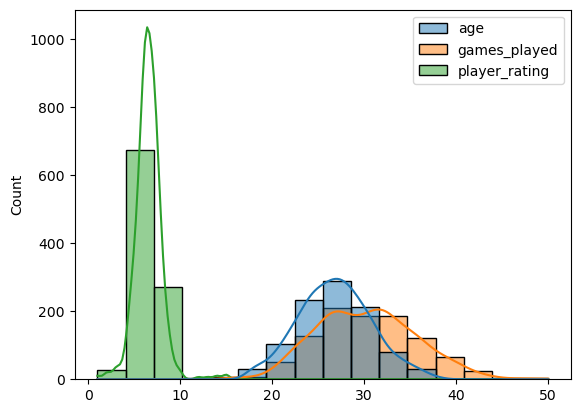

In [39]:
sns.histplot(df_no_outliers_age, kde=True)

<Axes: ylabel='Count'>

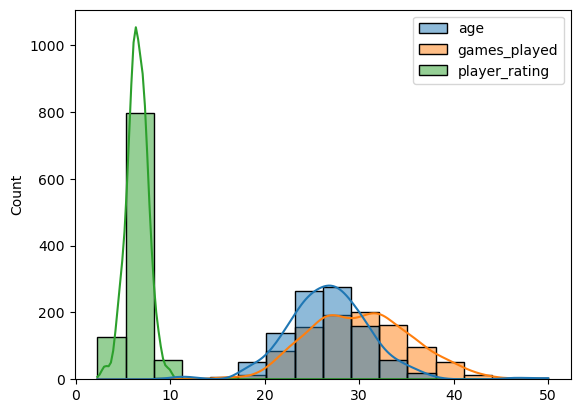

In [44]:
sns.histplot(df_no_outliers_rating, kde=True)